# Merging Clean Datasets

In [57]:
import pandas as pd
import seaborn as sns

In [59]:
# import all the df

rainfall = pd.read_csv("../01_exploratory_data_analysis/rainfall/dataset_rainfall.csv")
unemp = pd.read_csv("gdp_unemployment/gdppcap unemp and gini.csv")
protest = pd.read_csv("../01_exploratory_data_analysis/demonstrations/yearly_protest_data.csv")

In [60]:
rainfall.columns

Index(['Unnamed: 0', 'ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff'],
      dtype='object')

In [61]:
rainfall = rainfall.drop('Unnamed: 0', axis=1)

rainfall.country.nunique()

136

In [62]:
unemp = unemp.drop (['Unnamed: 0', 'pop'], axis=1)
unemp.country.nunique()

191

In [63]:
protest = protest.drop('Unnamed: 0', axis = 1)
protest = protest.rename(columns= {'year':'Year'})
protest.country.nunique()

136

In [64]:
## Merge the two dataframes on column country and check for differences in country names
unemp_c= unemp[['country', 'ISO3_code']].copy()
rainfall_c= rainfall[['country', 'ISO3_code']].copy()

merged_df = pd.merge(unemp_c, rainfall_c, on='ISO3_code', suffixes=('_unemp', '_rain'))

# Check if values of column 'b' are equal in both dataframes
merged_df['b_equal'] = merged_df['country_unemp'] == merged_df['country_rain']
merged_df

,country_unemp,ISO3_code,country_rain,b_equal
0,Afghanistan,AFG,Afghanistan,True
1,Afghanistan,AFG,Afghanistan,True
2,Afghanistan,AFG,Afghanistan,True
3,Afghanistan,AFG,Afghanistan,True
4,Afghanistan,AFG,Afghanistan,True
...,...,...,...,...
560891,Zimbabwe,ZWE,Zimbabwe,True
560892,Zimbabwe,ZWE,Zimbabwe,True
560893,Zimbabwe,ZWE,Zimbabwe,True
560894,Zimbabwe,ZWE,Zimbabwe,True


In [65]:
merged_df[merged_df['b_equal']==False]['country_rain'].unique()

array([], dtype=object)

In [66]:
#USA and Korea are diff in rainfall and unemp - change to rainfall names
unemp.loc[unemp['country']=='United States', 'country']='United States of America'
unemp.loc[unemp['country']=='South Korea', 'country']= 'Republic of Korea'

#repeat step above to check
## Merge the two dataframes on column country and check for differences in country names
unemp_c= unemp[['country', 'ISO3_code']].copy()
rainfall_c= rainfall[['country', 'ISO3_code']].copy()

merged_df = pd.merge(unemp_c, rainfall_c, on='ISO3_code', suffixes=('_unemp', '_rain'))

# Check if values of column 'b' are equal in both dataframes
merged_df['b_equal'] = merged_df['country_unemp'] == merged_df['country_rain']
merged_df[merged_df['b_equal']==False]['country_rain'].unique()

array([], dtype=object)

In [67]:
# merging rainfall and gdp data - limited by the rainfall data
df = rainfall.merge(unemp, on= ['ISO3_code', 'Year', 'country'], how='inner')

In [68]:
df.country.nunique()

136

In [69]:
df.columns

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'gdp_percap', 'gdp_percap_pchange', 'gdp_pchange',
       'unemp_rate', 'unemp_rate_pchange', 'gini', 'gini_pchange'],
      dtype='object')

In [70]:
df= df.sort_values(by=['country', 'Year'])
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Lithuania', 'Madagascar', 'M

In [71]:
protest = protest.sort_values(by=['country', 'Year'])
protest.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'M

In [72]:
fulldf = df.merge(protest, on = ['country', 'Year'], how='outer')
fulldf.columns

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'gdp_percap', 'gdp_percap_pchange', 'gdp_pchange',
       'unemp_rate', 'unemp_rate_pchange', 'gini', 'gini_pchange',
       'population', 'participants', 'number_events', 'yprotest',
       'protest_fraction'],
      dtype='object')

In [73]:
fulldf.sample(10)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,yearly_avg_rainfall,...,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,number_events,yprotest,protest_fraction
2833,EST,2003,3.459288,0.628214,9.0,1.702989e+10,Estonia,0.487,5.9,542.562500,...,7.596306,11.288,12.587273,0.371952,13.266582,1370720.0,4000.0,4.0,1.0,0.002918
5330,MYS,2012,9.793751,4.899578,6.0,2.583789e+11,Malaysia,0.571,26.6,2710.361364,...,5.473446,3.100,1.639344,0.451346,2.710385,29662831.0,43000.0,2.0,1.0,0.001450
7456,NaN,1990,NaN,NaN,NaN,NaN,Singapore,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3047132.0,0.0,0.0,0.0,0.000000
671,BGD,2013,15.493278,0.136548,4.0,1.726795e+11,Bangladesh,0.025,24.9,1814.642361,...,6.013612,4.426,8.613497,0.306651,0.000000,156532141.0,461450.0,13.0,1.0,0.002948
6796,PHL,2007,13.606507,0.175524,8.0,2.012166e+11,Philippines,0.813,26.7,2404.971264,...,6.519294,3.434,-15.251728,0.416175,-2.896406,91075184.0,0.0,0.0,0.0,0.000000
517,AUT,2018,1.109114,0.042659,10.0,4.062359e+11,Austria,0.248,8.7,836.123984,...,2.484223,4.933,-11.292933,0.308473,3.734168,8840521.0,0.0,0.0,0.0,0.000000
5546,MEX,2005,2.945672,5.198546,8.0,1.004312e+12,Mexico,0.581,21.8,588.293948,...,2.113255,3.558,-9.626619,0.509391,1.183848,105811504.0,950000.0,2.0,1.0,0.008978
526,AZE,1963,32.345665,4.884019,-7.0,8.472531e+09,Azerbaijan,0.297,12.7,605.275000,...,0.000000,0.900,0.000000,0.293984,0.000000,NaN,NaN,NaN,NaN,NaN
5748,MAR,1984,12.123171,0.018335,-8.0,3.030772e+10,Morocco,0.513,16.9,149.643393,...,6.418386,8.910,0.000000,0.364689,-7.256297,NaN,NaN,NaN,NaN,NaN
6638,PRY,1980,29.464600,0.000000,-8.0,1.096893e+10,Paraguay,0.130,23.8,891.586288,...,11.712135,3.400,0.000000,0.500585,0.000000,NaN,NaN,NaN,NaN,NaN


In [74]:
fulldf.to_csv("merged_df.csv")

In [75]:
fulldf.head(15)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,yearly_avg_rainfall,...,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,number_events,yprotest,protest_fraction
0,AFG,1960,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.586,11.9,318.565807,...,NaN,7.908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,1961,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.588,12.3,294.653108,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,1962,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.591,12.0,243.503638,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,1963,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.593,12.8,307.702050,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,1964,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.596,11.3,300.362434,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,1965,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.598,12.2,320.094246,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,1966,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.601,12.5,267.692460,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFG,1967,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.606,11.9,330.657077,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AFG,1968,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.610,12.0,315.201058,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AFG,1969,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.615,11.6,331.842262,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


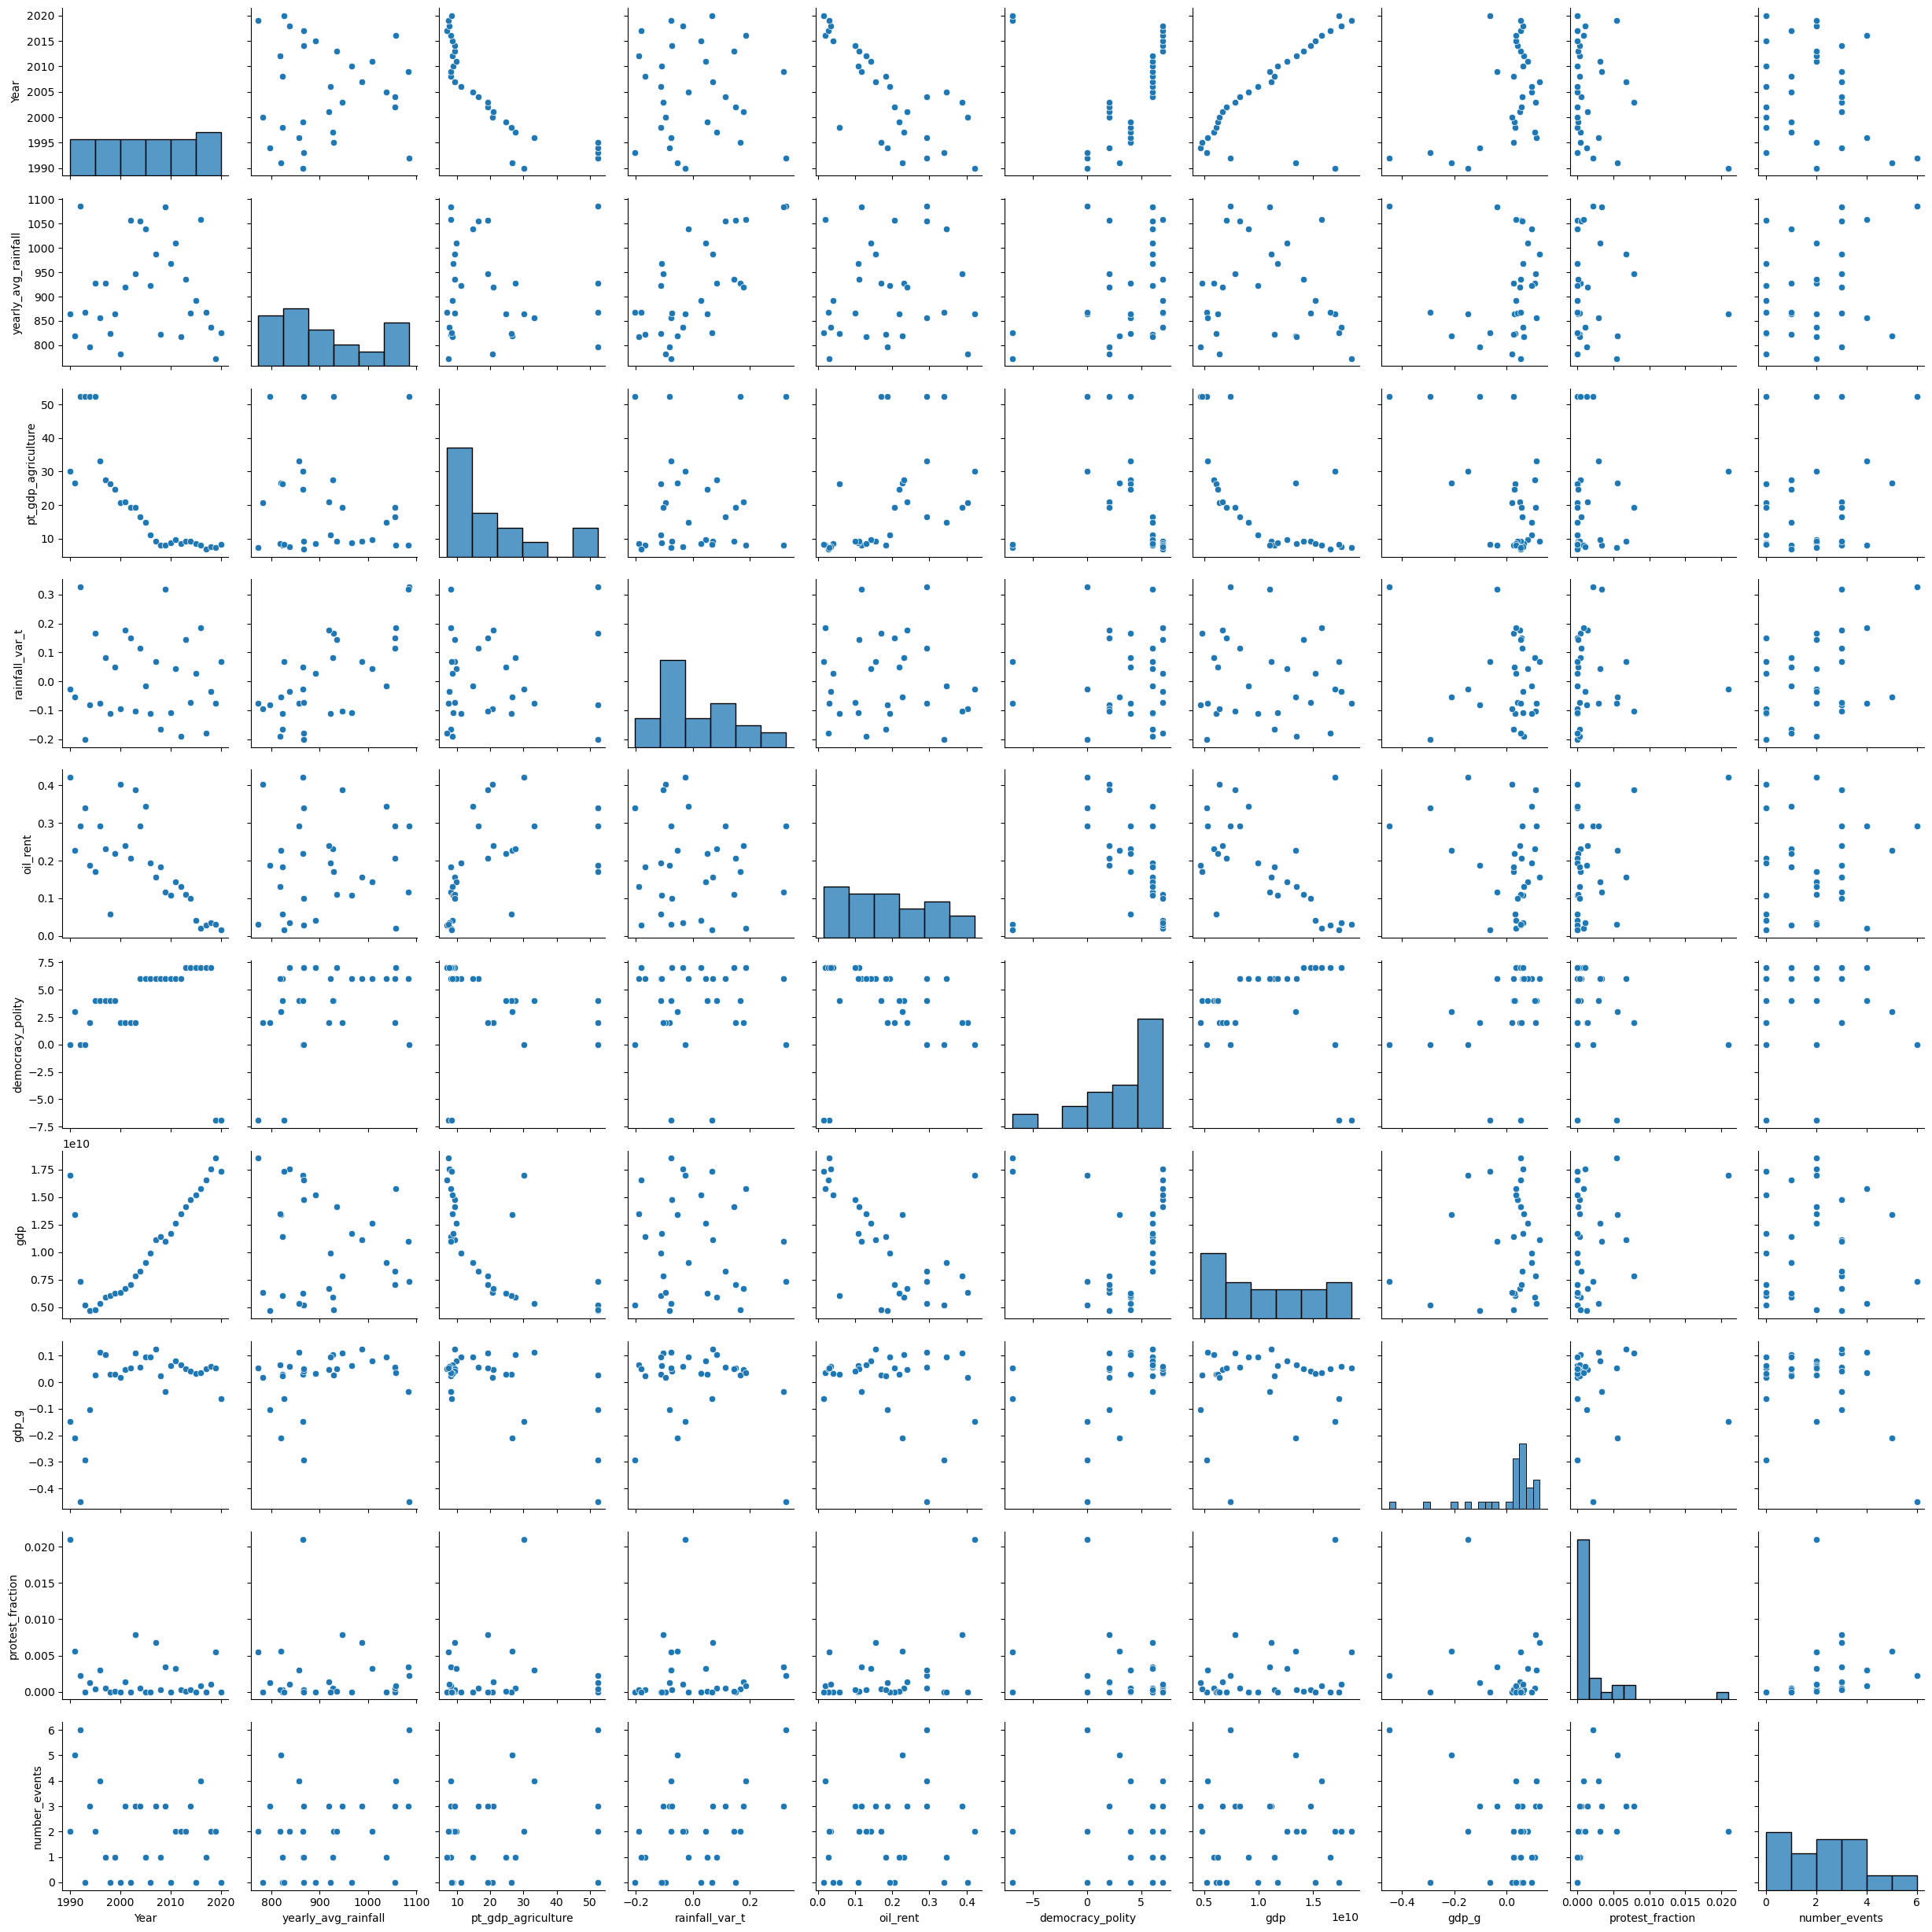

In [91]:
georgia = fulldf[fulldf['country'] == 'Georgia'].dropna()
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'rainfall_var_t', 'oil_rent', 'democracy_polity', 'gdp', 'gdp_g', 'protest_fraction', 'number_events']

sns.pairplot(georgia[feats])

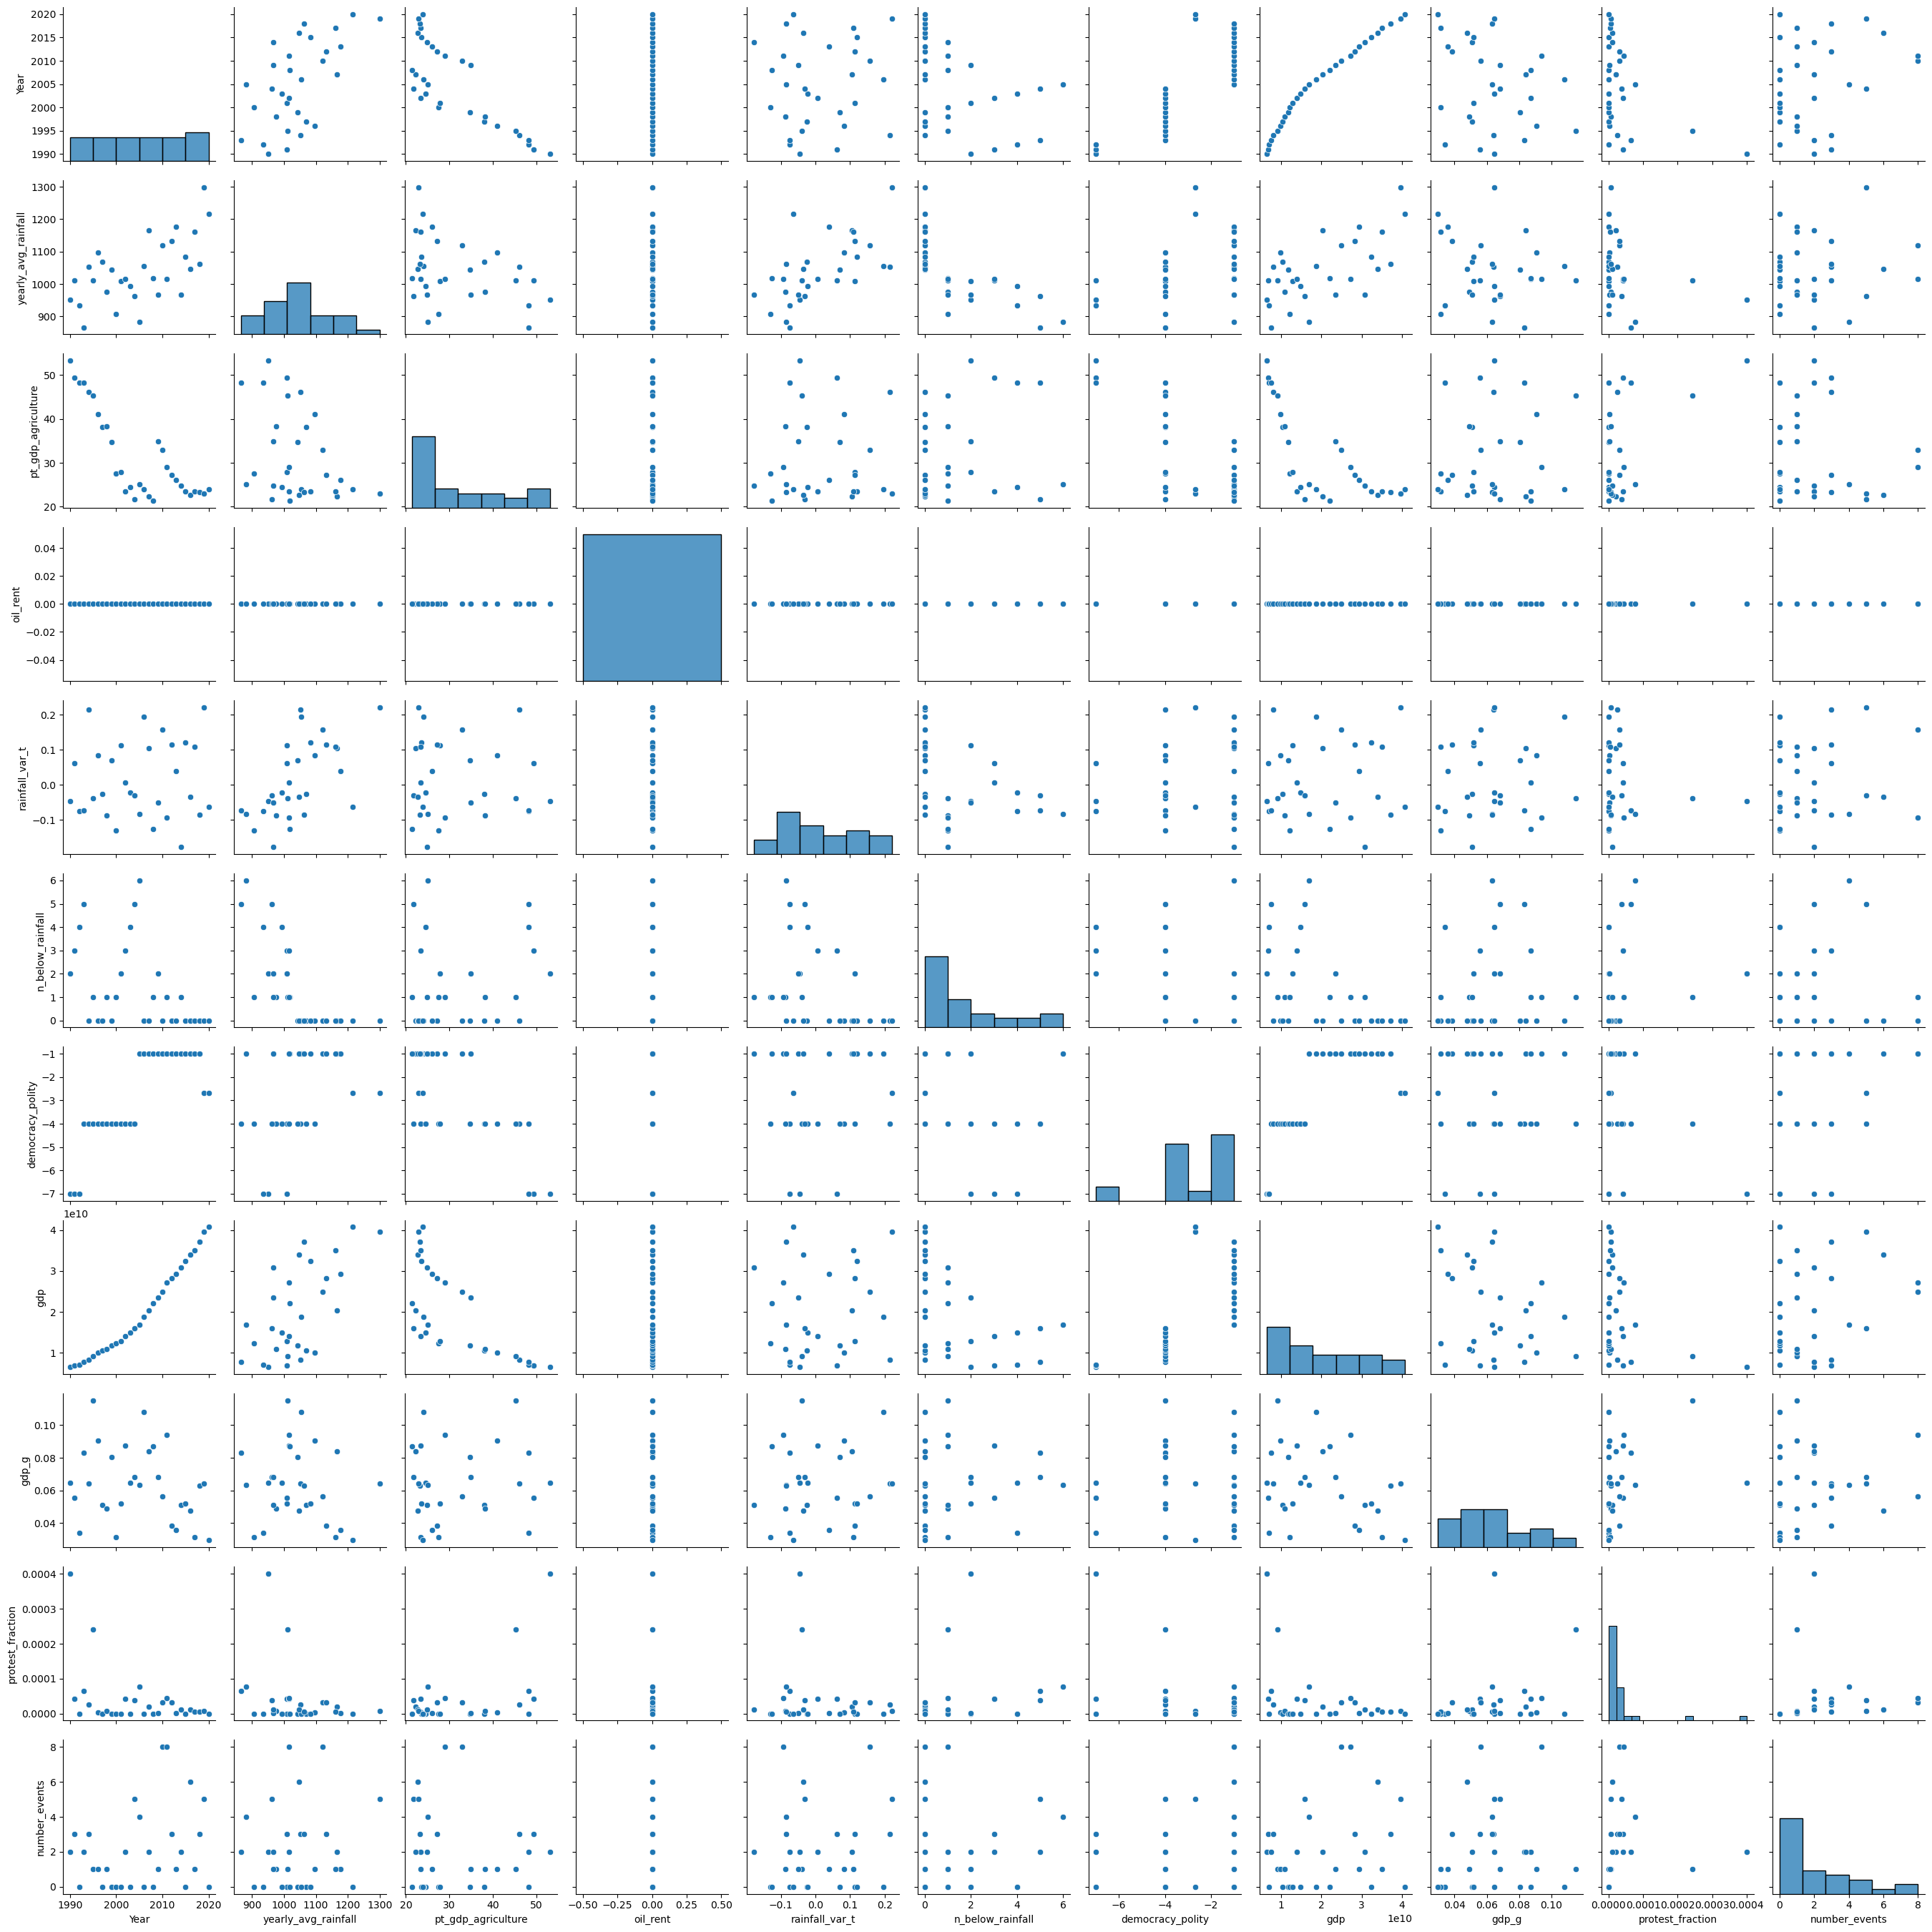

In [96]:
country = fulldf[fulldf['country'] == 'Uganda']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'rainfall_var_t', 'n_below_rainfall', 'democracy_polity', 'gdp', 'gdp_g','protest_fraction', 'number_events']

sns.pairplot(country[feats].dropna())

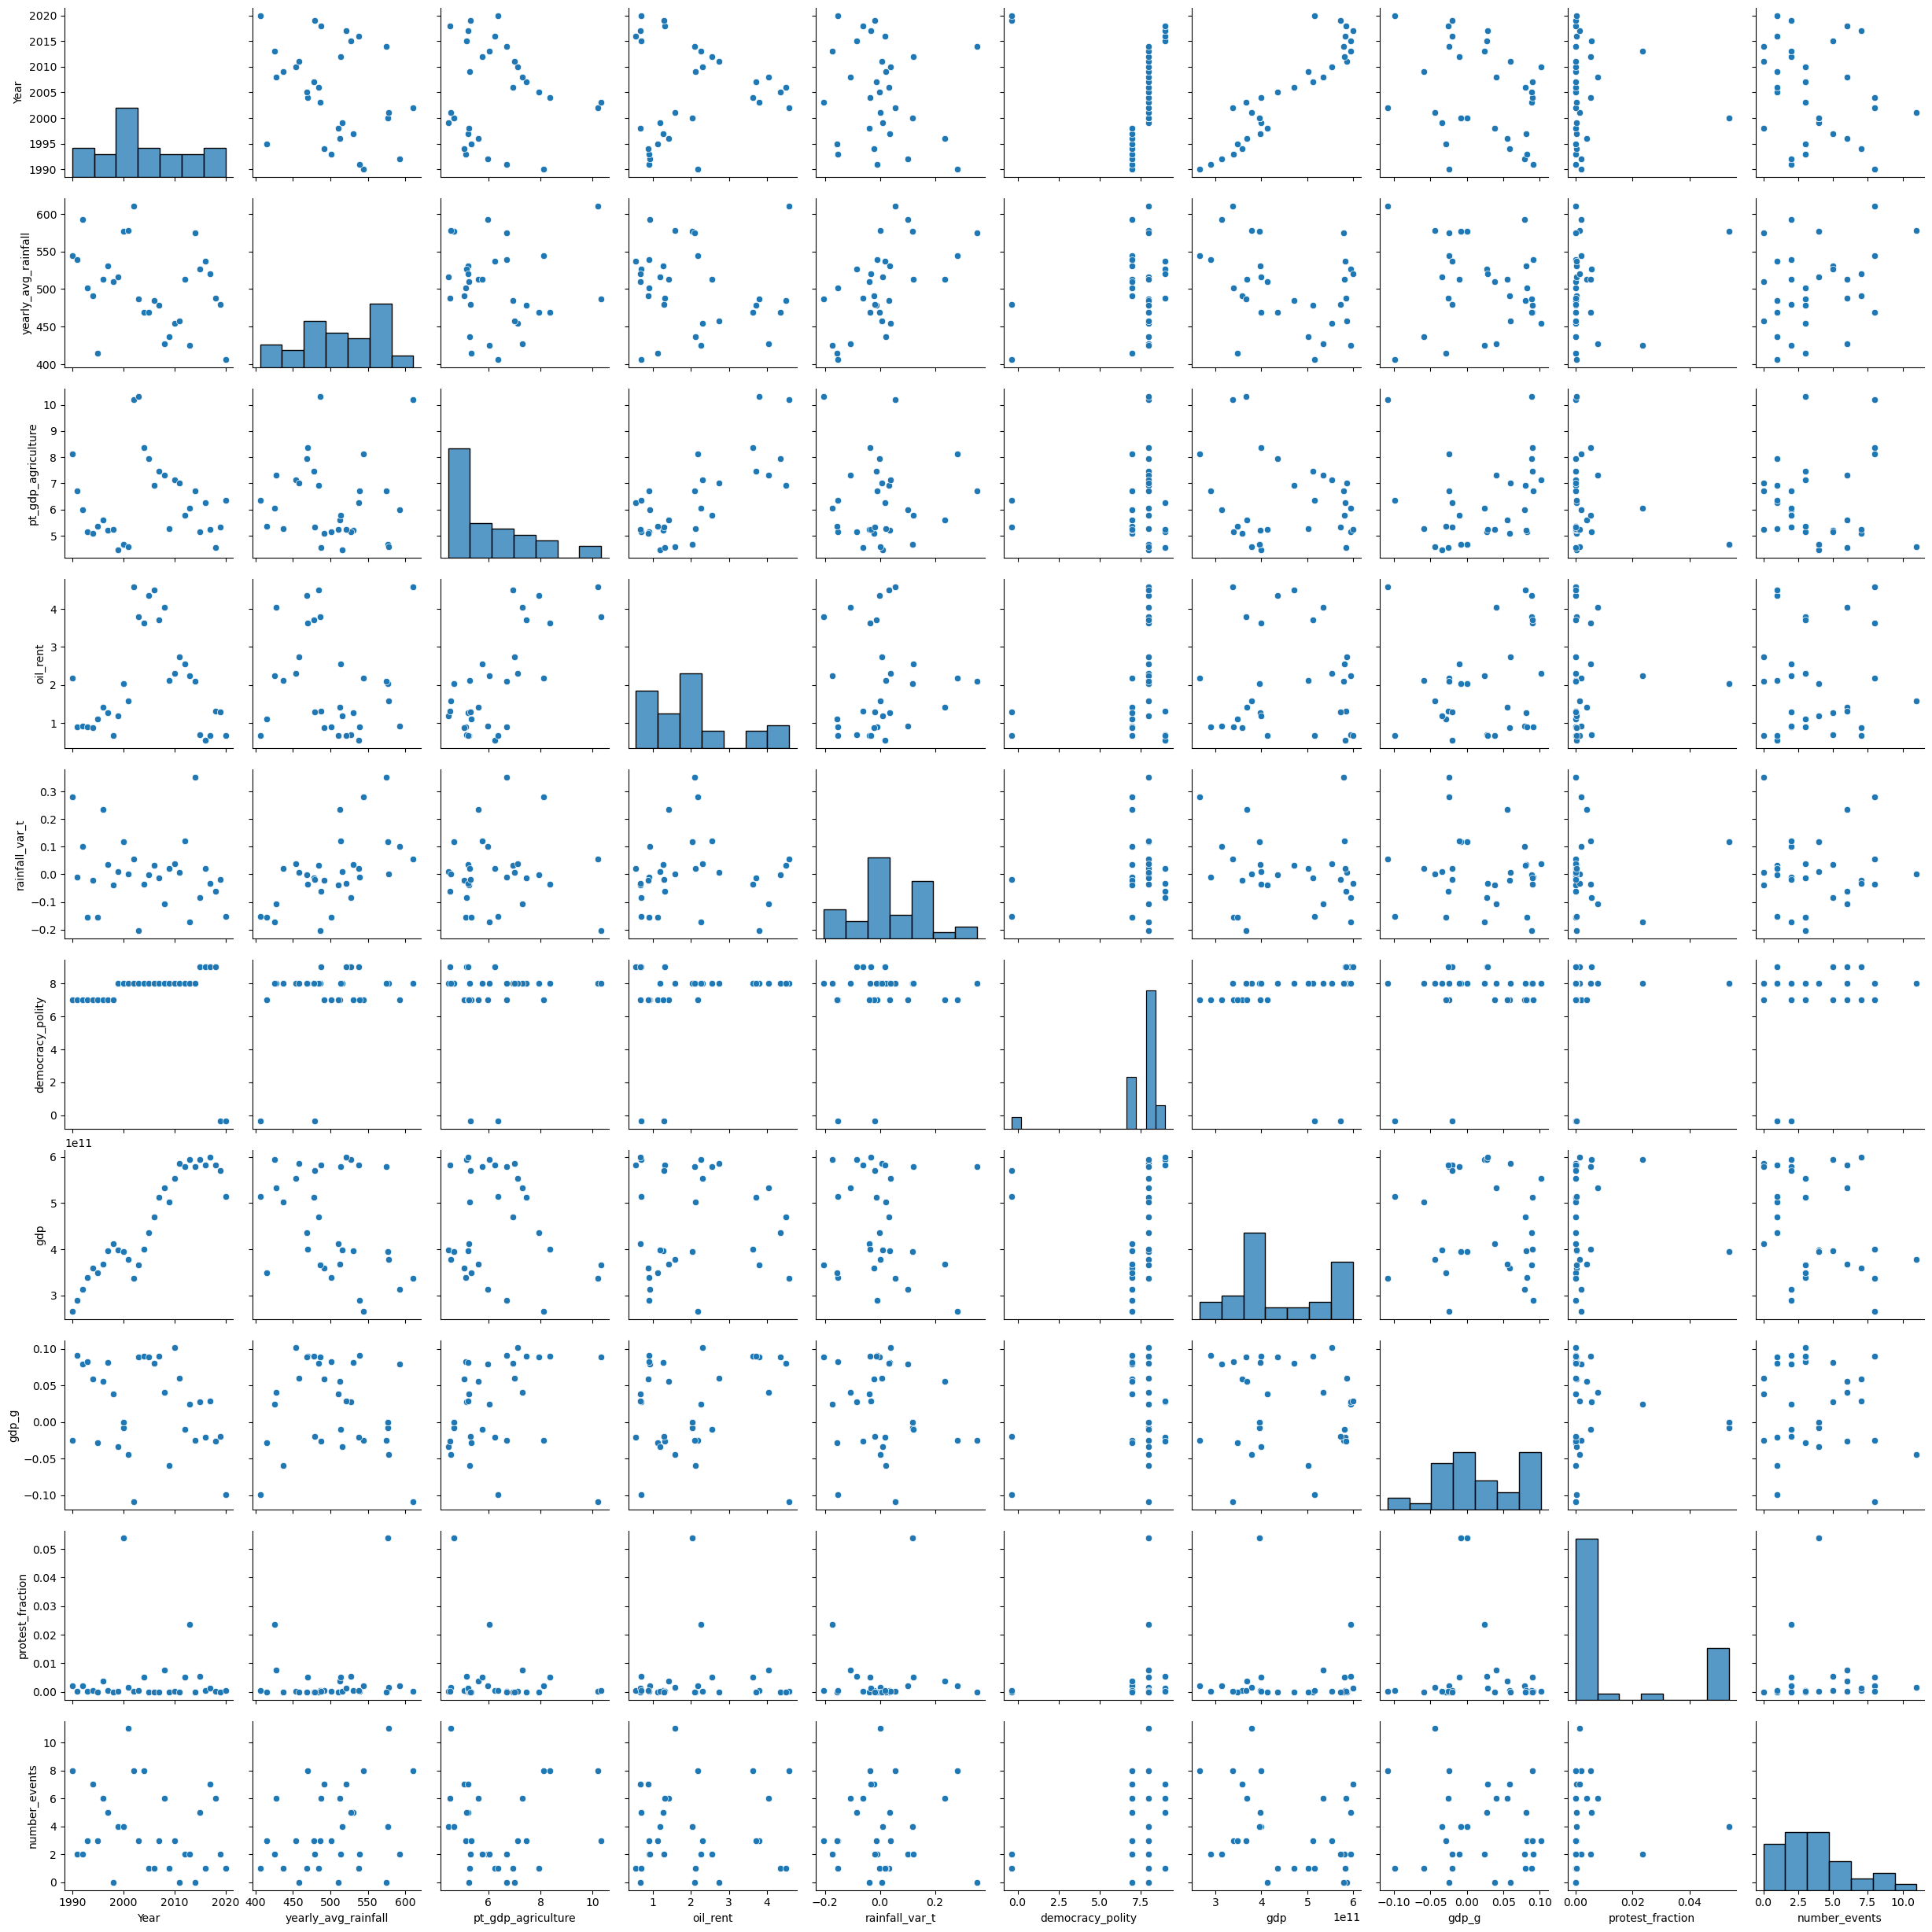

In [ ]:
country = fulldf[fulldf['country'] == 'Argentina']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'rainfall_var_t','democracy_polity', 'gdp', 'gdp_g','protest_fraction', 'number_events']

sns.pairplot(country[feats].dropna())

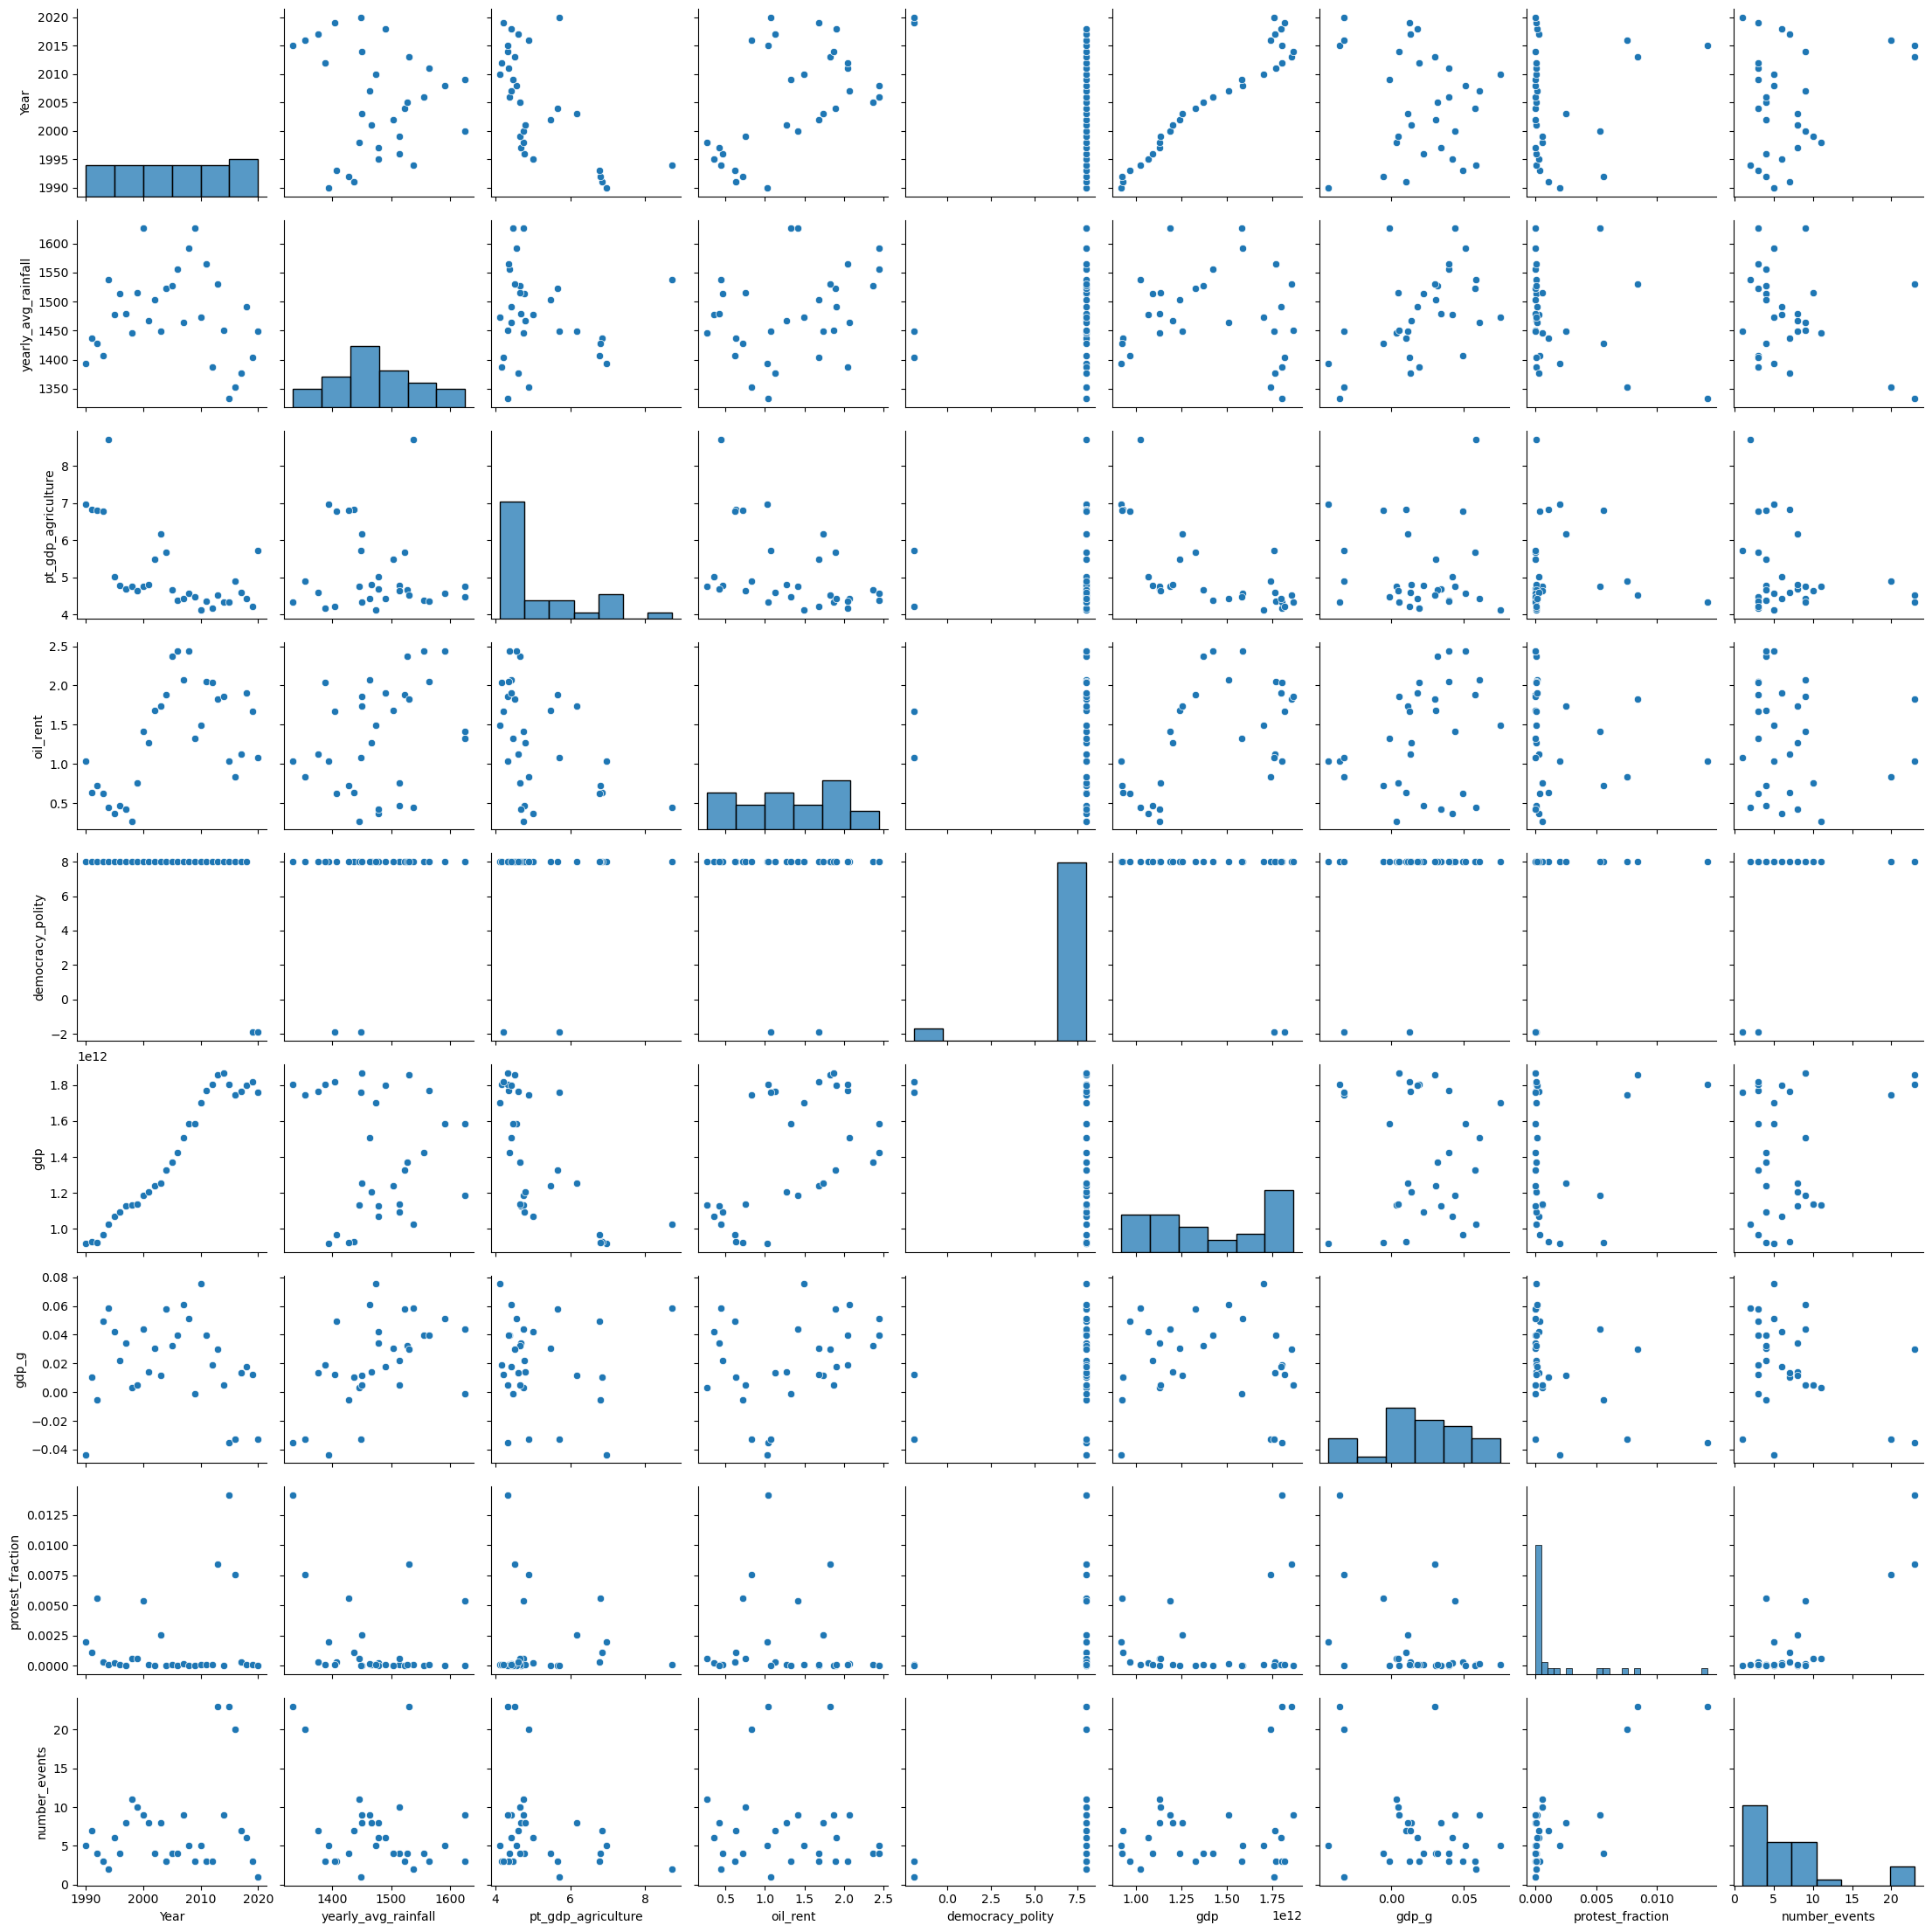

In [90]:
country = fulldf[fulldf['ISO3_code'] == 'BRA']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'gdp_g','protest_fraction', 'number_events']

sns.pairplot(country[feats].dropna())

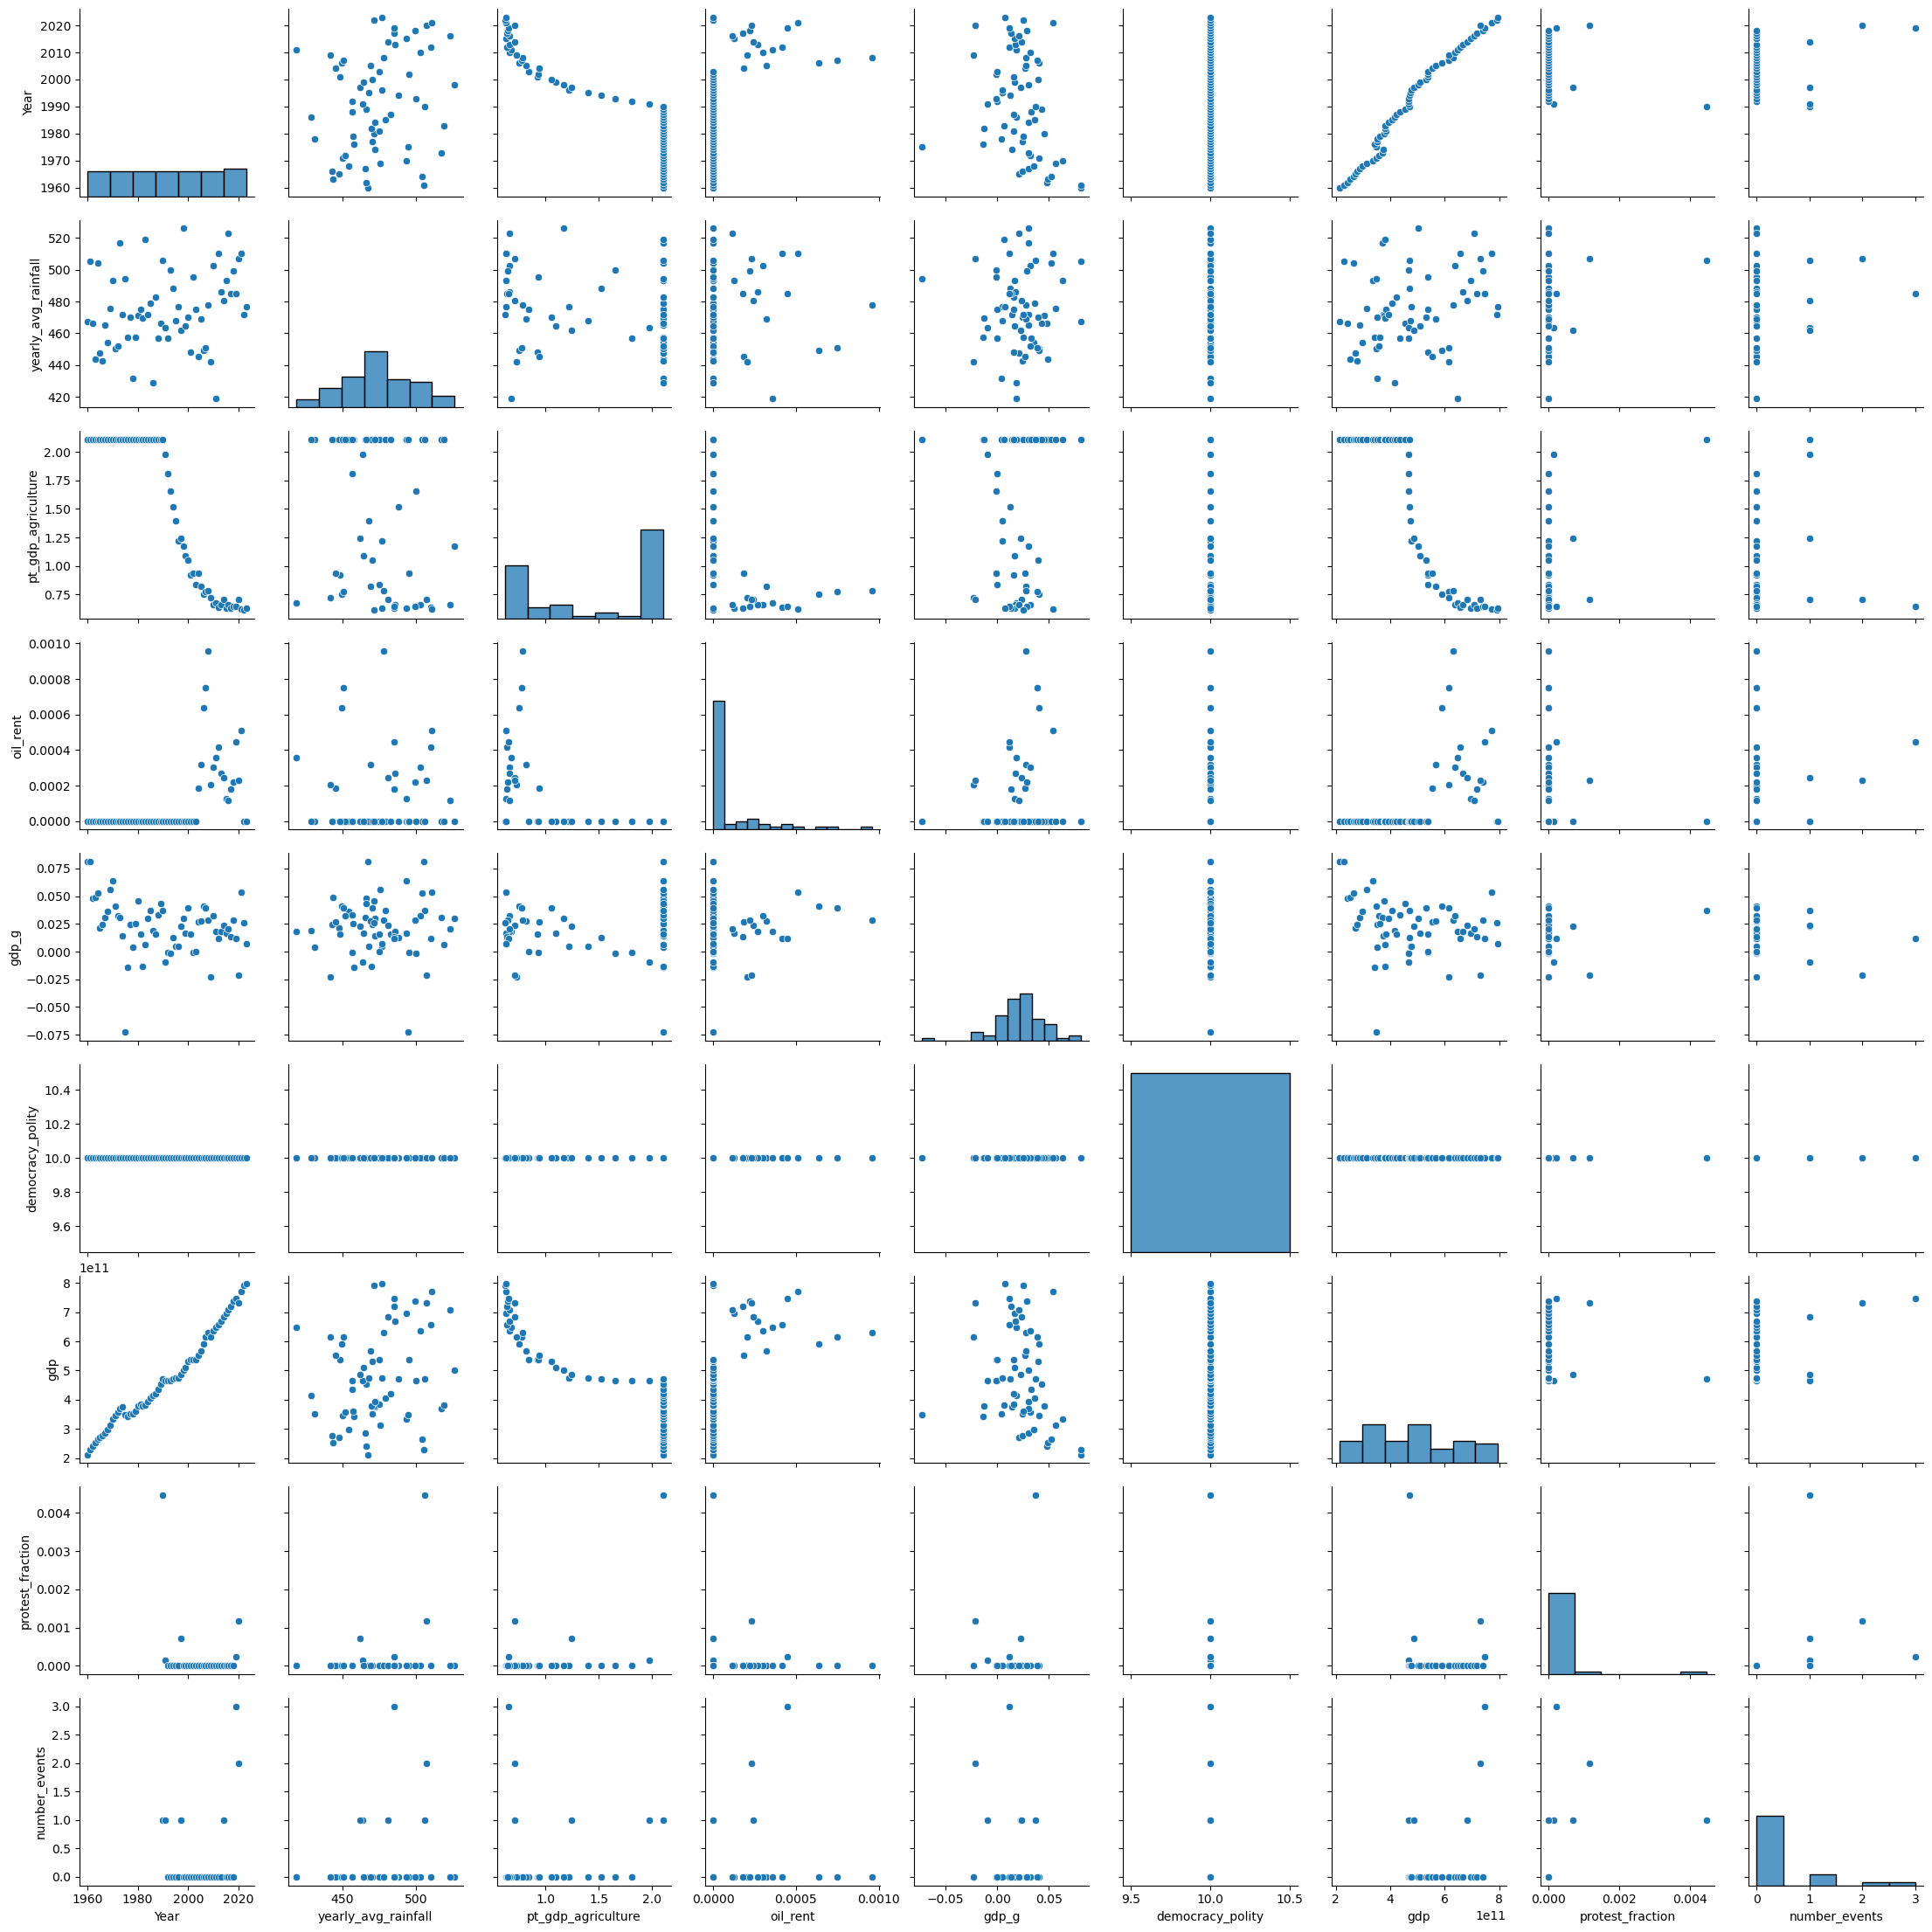

In [83]:
country = fulldf[fulldf['ISO3_code'] == 'CHE']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'gdp_g', 'democracy_polity', 'gdp', 'protest_fraction', 'number_events']

sns.pairplot(country[feats])

In [54]:
fulldf[fulldf['ISO3_code'] == 'CHE']

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,yearly_avg_rainfall,...,gdp_percap,gdp_percap_pchange,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
7898,CHE,1960,2.109859,0.000000,10.0,2.126190e+11,Switzerland,0.230,5.8,467.327264,...,61837.77,NaN,NaN,1.818,NaN,0.330546,NaN,NaN,NaN,NaN
7899,CHE,1961,2.109859,0.000000,10.0,2.298596e+11,Switzerland,0.232,6.7,505.006702,...,61837.77,0.000000,8.108669,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7900,CHE,1962,2.109859,0.000000,10.0,2.408697e+11,Switzerland,0.234,4.8,466.214217,...,61837.77,0.000000,4.789946,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7901,CHE,1963,2.109859,0.000000,10.0,2.526222e+11,Switzerland,0.237,4.9,443.840975,...,61837.77,0.000000,4.879198,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7902,CHE,1964,2.109859,0.000000,10.0,2.659009e+11,Switzerland,0.239,5.9,504.138918,...,61837.77,0.000000,5.256347,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,CHE,2019,0.647746,0.000445,10.0,7.471098e+11,Switzerland,0.367,7.7,484.999498,...,80315.68,0.423089,1.141978,4.394,-6.768513,0.339983,2.586823,8575280.0,2050.0,0.000239
7958,CHE,2020,0.705478,0.000231,10.0,7.311087e+11,Switzerland,0.367,8.1,506.837045,...,78023.34,-2.854162,-2.141733,4.817,9.626764,0.337379,-0.765955,8638167.0,10050.0,0.001163
7959,CHE,2021,0.625932,0.000512,10.0,7.705292e+11,Switzerland,0.367,6.7,510.413959,...,81603.21,4.588204,5.391879,5.097,5.812747,0.330546,-2.025400,NaN,NaN,NaN
7960,CHE,2022,0.614575,0.000000,10.0,7.903189e+11,Switzerland,0.367,8.4,471.604969,...,83007.28,1.720606,2.568331,4.300,-15.636649,0.330546,0.000000,NaN,NaN,NaN


In [55]:
fulldf.columns

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'gdp_percap', 'gdp_percap_pchange', 'gdp_pchange',
       'unemp_rate', 'unemp_rate_pchange', 'gini', 'gini_pchange',
       'population', 'participants', 'protest_fraction'],
      dtype='object')

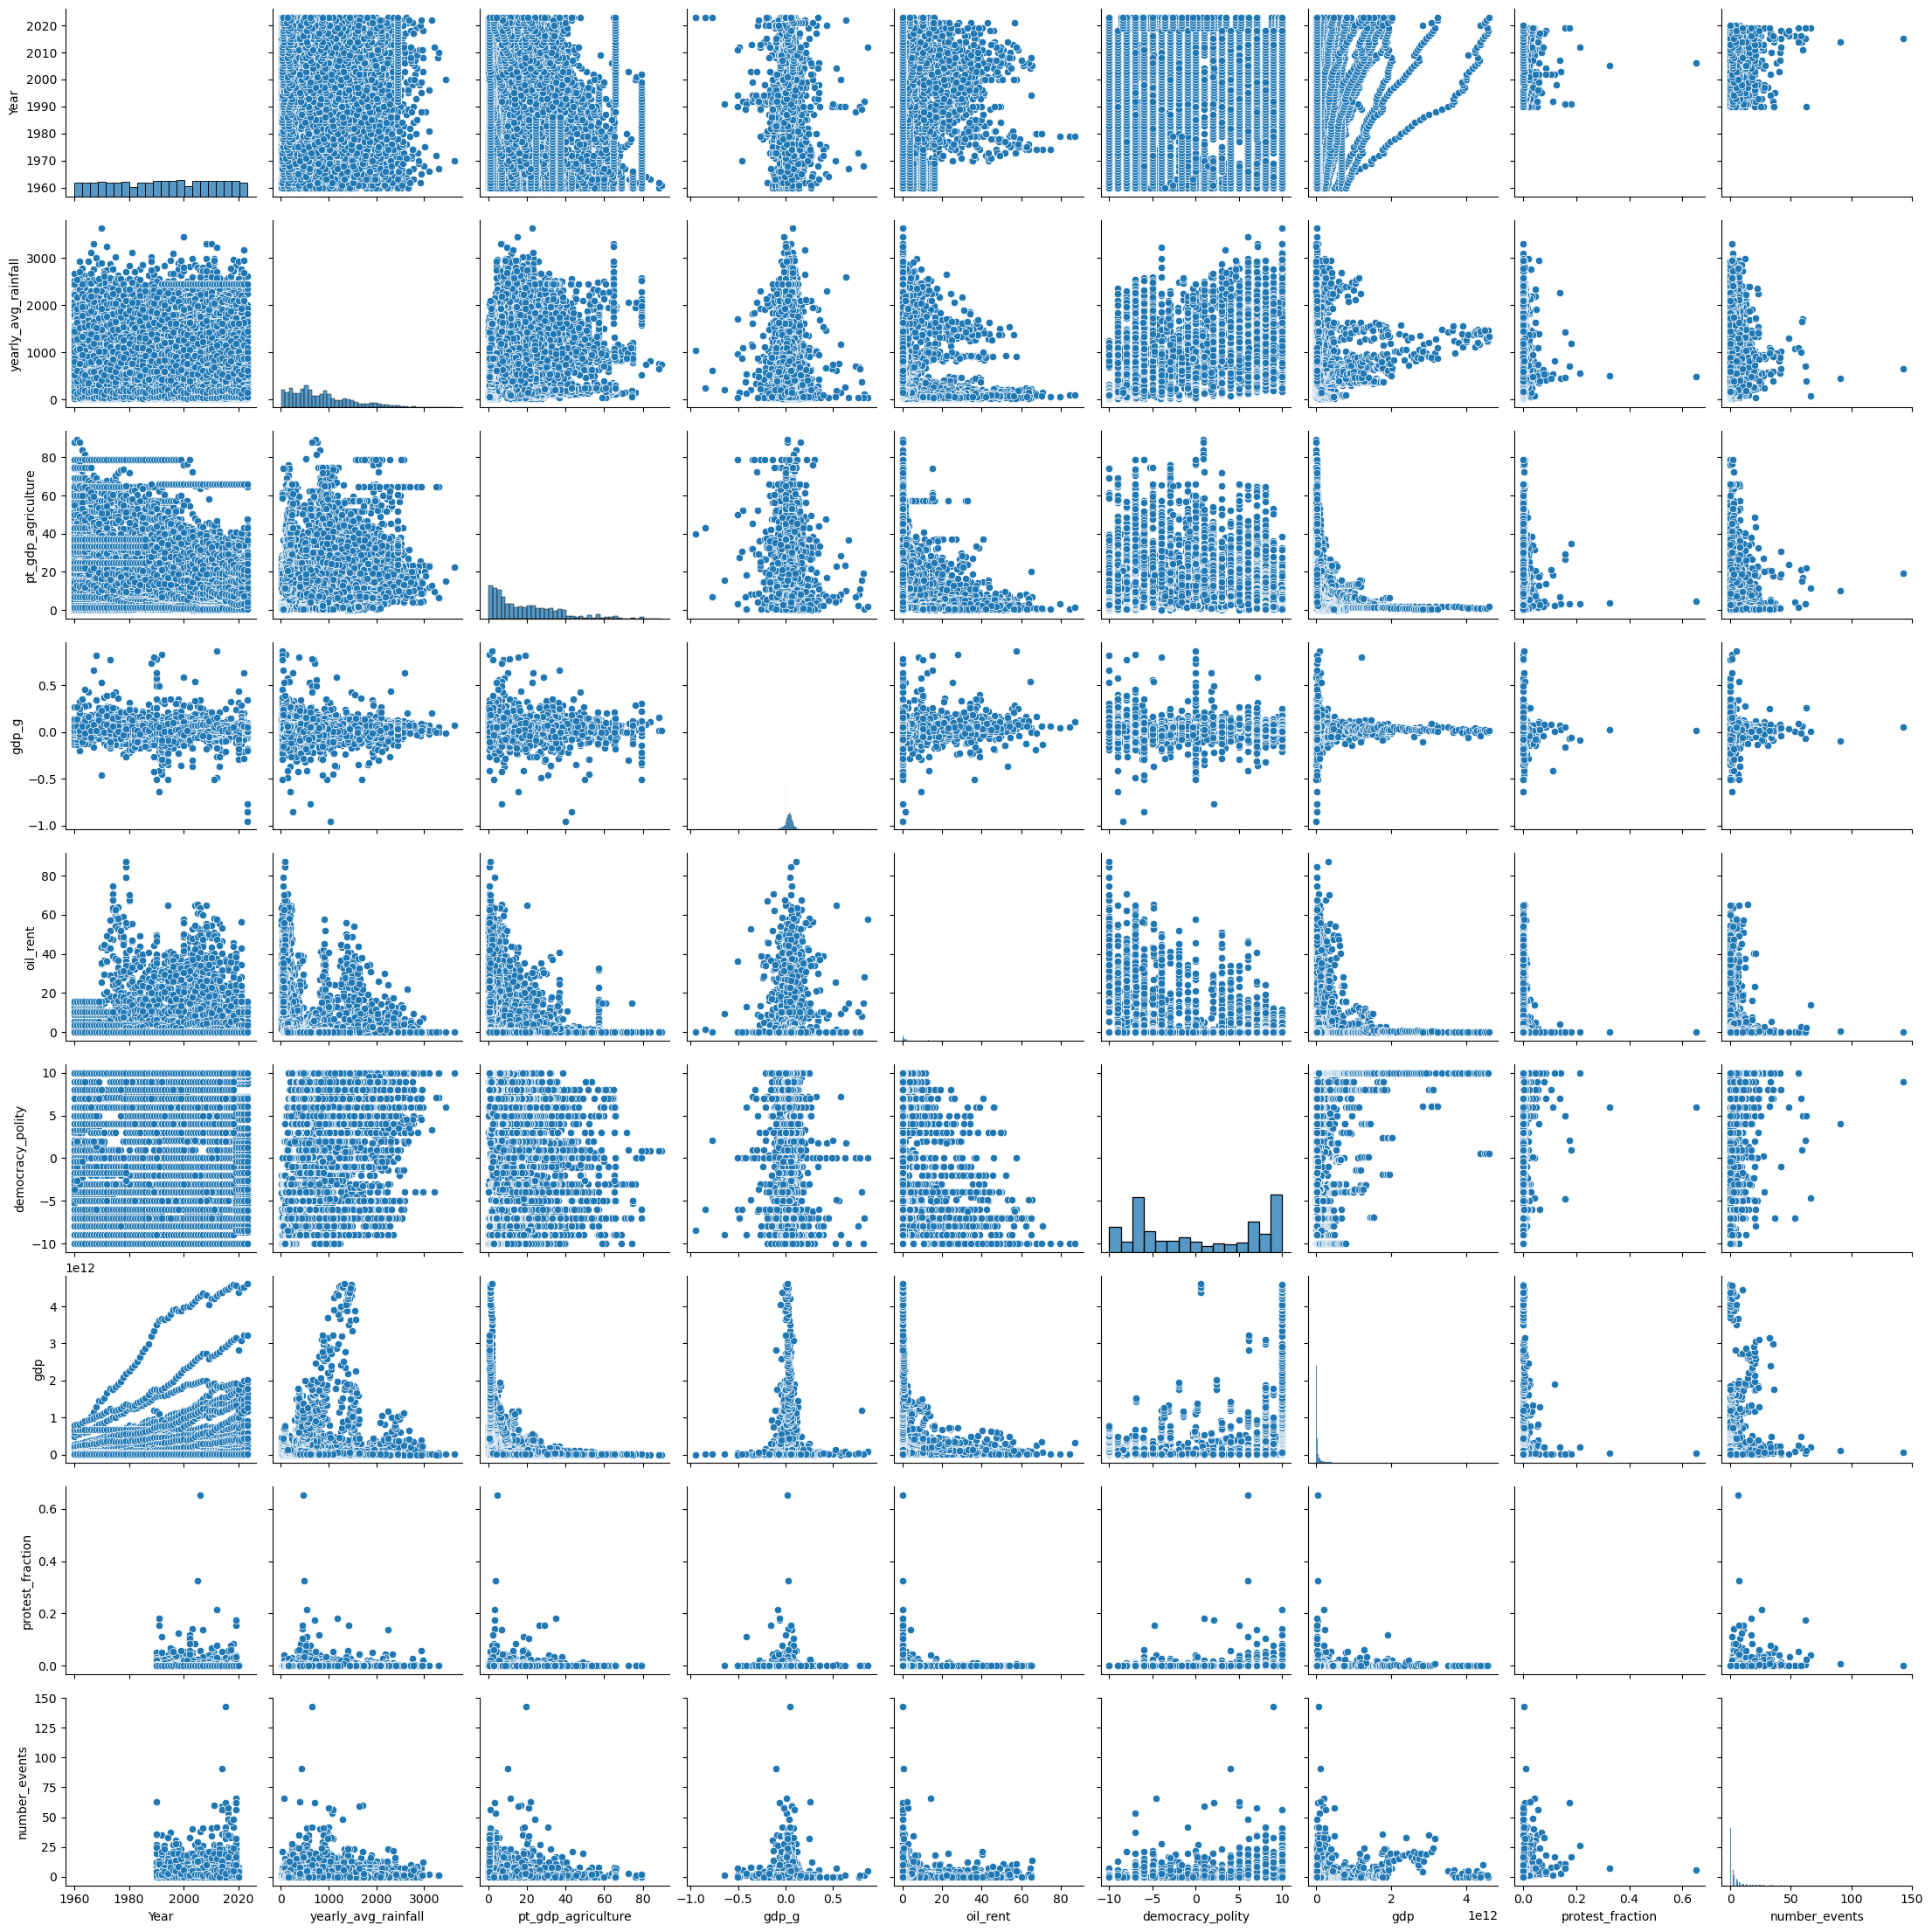

In [82]:
sns.pairplot(fulldf[['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'gdp_g','oil_rent', 'democracy_polity', 'gdp', 'protest_fraction', 'number_events']])